# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

new_api = 'baa85d49f99b9efa2601907db53b1ec2'
part_li = []
coord = []
part_di = {}
part_df = pd.DataFrame()

for city in cities:

    # Build query URL
    query_url = url + "appid=" + new_api + "&q=" + city
    response = requests.get(query_url)
    part = response.json()
    part_li.append(part)
    part_di.update({city : part})
    coord.append(part)
    time.sleep(1.1)

In [4]:
pull_di = {}
pull_li = []

for city in cities:
    pull_li.append(part_di[city])
    pull_di[city] = part_di[city]
############Try this later at home    
    print(pull_di)

{'faya': {'coord': {'lon': 42.45, 'lat': 18.39}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 286.66, 'pressure': 1026, 'humidity': 100, 'temp_min': 286.15, 'temp_max': 287.15}, 'visibility': 9000, 'wind': {'speed': 2.6, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1574807317, 'sys': {'type': 1, 'id': 7396, 'country': 'SA', 'sunrise': 1574825009, 'sunset': 1574865134}, 'timezone': 10800, 'id': 110690, 'name': 'Faya', 'cod': 200}}
{'faya': {'coord': {'lon': 42.45, 'lat': 18.39}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 286.66, 'pressure': 1026, 'humidity': 100, 'temp_min': 286.15, 'temp_max': 287.15}, 'visibility': 9000, 'wind': {'speed': 2.6, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1574807317, 'sys': {'type': 1, 'id': 7396, 'country': 'SA', 'sunrise': 1574825009, 'sunset': 1574865134}, 'timezone': 10800, 'id': 110690, 'name

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weat_df = pd.DataFrame(pull_di)
weat_piv = weat_df.transpose()
weat_piv

weat_piv
del weat_piv['message']
del weat_piv['cod']
weat_drop = weat_piv.dropna(how='all')
weat_drop.to_csv('CityWeather.csv')
weat_drop

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,rain,snow
faya,"{'lon': 42.45, 'lat': 18.39}","[{'id': 501, 'main': 'Rain', 'description': 'm...",stations,"{'temp': 286.66, 'pressure': 1026, 'humidity':...",9000,"{'speed': 2.6, 'deg': 180}",{'all': 75},1574807317,"{'type': 1, 'id': 7396, 'country': 'SA', 'sunr...",10800,110690,Faya,NaN,NaN
kilifi,"{'lon': 39.85, 'lat': -3.63}","[{'id': 500, 'main': 'Rain', 'description': 'l...",model,"{'temp': 300.43, 'pressure': 1010, 'humidity':...",NaN,"{'speed': 8.06, 'deg': 24}",{'all': 33},1574807318,"{'country': 'KE', 'sunrise': 1574823546, 'suns...",10800,192067,Kilifi,{'3h': 1.31},NaN
verkhnevilyuysk,"{'lon': 120.31, 'lat': 63.45}","[{'id': 600, 'main': 'Snow', 'description': 'l...",model,"{'temp': 252.07, 'pressure': 1019, 'humidity':...",NaN,"{'speed': 4.54, 'deg': 241}",{'all': 100},1574807319,"{'country': 'RU', 'sunrise': 1574816111, 'suns...",32400,2013639,Verkhnevilyuysk,NaN,{'3h': 0.13}
bluff,"{'lon': 149.07, 'lat': -23.58}","[{'id': 803, 'main': 'Clouds', 'description': ...",model,"{'temp': 296.44, 'pressure': 1013, 'humidity':...",NaN,"{'speed': 0.78, 'deg': 120}",{'all': 55},1574807322,"{'country': 'AU', 'sunrise': 1574795326, 'suns...",36000,2175403,Bluff,NaN,NaN
atuona,"{'lon': -139.03, 'lat': -9.8}","[{'id': 800, 'main': 'Clear', 'description': '...",model,"{'temp': 299.64, 'pressure': 1011, 'humidity':...",NaN,"{'speed': 4.93, 'deg': 61}",{'all': 10},1574807323,"{'country': 'PF', 'sunrise': 1574779490, 'suns...",-34200,4020109,Atuona,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ewa beach,"{'lon': -158.01, 'lat': 21.32}","[{'id': 802, 'main': 'Clouds', 'description': ...",stations,"{'temp': 302.2, 'pressure': 1014, 'humidity': ...",16093,"{'speed': 2.6, 'deg': 40}",{'all': 40},1574807889,"{'type': 1, 'id': 7878, 'country': 'US', 'sunr...",-36000,5855051,Ewa Beach,NaN,NaN
nioki,"{'lon': 17.69, 'lat': -2.72}","[{'id': 500, 'main': 'Rain', 'description': 'l...",model,"{'temp': 295.15, 'pressure': 1010, 'humidity':...",NaN,"{'speed': 1.03, 'deg': 291}",{'all': 39},1574808048,"{'country': 'CD', 'sunrise': 1574742533, 'suns...",3600,2311968,Nioki,{'3h': 2.19},NaN
tubuala,"{'lon': -79.03, 'lat': 9.52}","[{'id': 802, 'main': 'Clouds', 'description': ...",stations,"{'temp': 304.15, 'pressure': 1004, 'humidity':...",10000,"{'speed': 4.1, 'deg': 20}",{'all': 40},1574808050,"{'type': 1, 'id': 7216, 'country': 'PA', 'sunr...",-18000,3700393,Tubuala,NaN,NaN
daru,"{'lon': 143.21, 'lat': -9.07}","[{'id': 802, 'main': 'Clouds', 'description': ...",model,"{'temp': 301.8, 'pressure': 1010, 'humidity': ...",NaN,"{'speed': 2.75, 'deg': 109}",{'all': 41},1574808052,"{'country': 'PG', 'sunrise': 1574798224, 'suns...",36000,2098329,Daru,NaN,NaN


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
lat_ls = weat_drop['coord']
temp_ls = weat_drop['main']
lat_di = {}
temp_di = {}
drop_cit = weat_drop.index

for city in drop_cit:
    lat_di[city] = lat_ls[city]['lat']    
    temp_di[city] = temp_ls[city]['temp']
    
#convert kelvin to farenheit
temp_f = []

for val in temp_di.values():
    temp_f.append((val - 273.15) * (9/5) + 32)

    
lat_t_df = pd.DataFrame(list(zip(lat_di.values(), temp_f)), columns=['Latitude', 'Temperature'],index=lat_di.keys())
lat_t_df.to_csv('Lat_Vs_Temp.csv')
lat_t_df

,Latitude,Temperature
faya,18.39,56.318
kilifi,-3.63,81.104
verkhnevilyuysk,63.45,-5.944
bluff,-23.58,73.922
atuona,-9.80,79.682
...,...,...
ewa beach,21.32,84.290
nioki,-2.72,71.600
tubuala,9.52,87.800
daru,-9.07,83.570


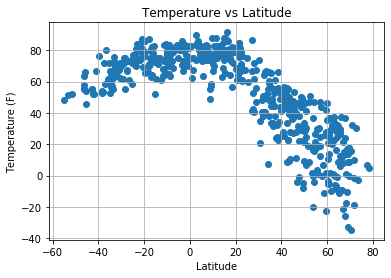

In [8]:
plt.scatter(lat_t_df['Latitude'], lat_t_df['Temperature'])
plt.title("Temperature vs Latitude")
plt.ylabel('Temperature (F)')
plt.xlabel("Latitude")
plt.grid(True)
# Save the Figure
plt.savefig('Temperature vs Lat.png')
# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

In [9]:
lat_ls = weat_drop['coord']
hum_ls = weat_drop['main']
lat_di = {}
hum_di = {}
drop_cit = weat_drop.index


for city in drop_cit:
    lat_di[city] = lat_ls[city]['lat']    
    hum_di[city] = hum_ls[city]['humidity']
    
lat_h_df = pd.DataFrame(list(zip(lat_di.values(), hum_di.values())), columns=['Latitude', 'Humidity (%)'],index=lat_di.keys())
lat_h_df.to_csv('Lat_Vs_Humidity.csv')
lat_h_df

,Latitude,Humidity (%)
faya,18.39,100
kilifi,-3.63,82
verkhnevilyuysk,63.45,92
bluff,-23.58,77
atuona,-9.80,72
...,...,...
ewa beach,21.32,51
nioki,-2.72,96
tubuala,9.52,66
daru,-9.07,62


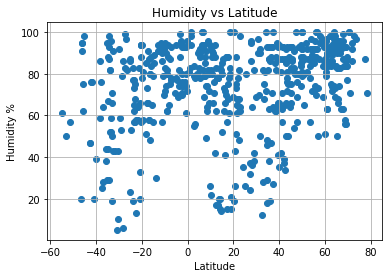

In [10]:
plt.scatter(lat_h_df['Latitude'], lat_h_df['Humidity (%)'])
plt.title("Humidity vs Latitude")
plt.ylabel('Humidity %')
plt.xlabel("Latitude")
plt.grid(True)
# Save the Figure
plt.savefig('Humidity vs Lat.png')
# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

In [11]:
lat_ls = weat_drop['coord']
cloud_ls = weat_drop['clouds']
lat_di = {}
cloud_di = {}
drop_cit = weat_drop.index


for city in drop_cit:
    lat_di[city] = lat_ls[city]['lat']    
    cloud_di[city] = cloud_ls[city]['all']
    
lat_c_df = pd.DataFrame(list(zip(lat_di.values(), cloud_di.values())), columns=['Latitude', 'Cloudiness (%)'],index=lat_di.keys())
lat_c_df.to_csv('Lat_Vs_Cloudiness.csv')
lat_c_df

,Latitude,Cloudiness (%)
faya,18.39,75
kilifi,-3.63,33
verkhnevilyuysk,63.45,100
bluff,-23.58,55
atuona,-9.80,10
...,...,...
ewa beach,21.32,40
nioki,-2.72,39
tubuala,9.52,40
daru,-9.07,41


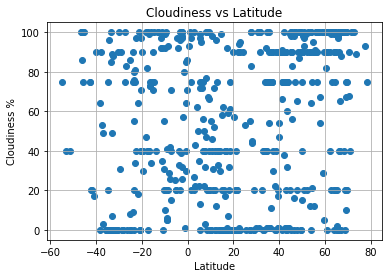

In [12]:
plt.scatter(lat_c_df['Latitude'], lat_c_df['Cloudiness (%)'])
plt.title("Cloudiness vs Latitude")
plt.ylabel('Cloudiness %')
plt.xlabel("Latitude")
plt.grid(True)
# Save the Figure
plt.savefig('Cloudiness vs Lat.png')
# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

In [13]:
lat_ls = weat_drop['coord']
wind_ls = weat_drop['wind']
lat_di = {}
wind_di = {}
drop_cit = weat_drop.index

for city in drop_cit:
    lat_di[city] = lat_ls[city]['lat']    
    wind_di[city] = wind_ls[city]['speed']
    
speed = []
    
#convert wind speed from m/s to mph
for val in wind_di.values():
    speed.append(val * 2.236936)
    
lat_w_df = pd.DataFrame(list(zip(lat_di.values(), speed)), columns=['Latitude', 'Wind Speed (mph)'],index=lat_di.keys())
lat_w_df.to_csv('Lat_Vs_WindSpeed.csv')
lat_w_df

,Latitude,Wind Speed (mph)
faya,18.39,5.816034
kilifi,-3.63,18.029704
verkhnevilyuysk,63.45,10.155689
bluff,-23.58,1.744810
atuona,-9.80,11.028094
...,...,...
ewa beach,21.32,5.816034
nioki,-2.72,2.304044
tubuala,9.52,9.171438
daru,-9.07,6.151574


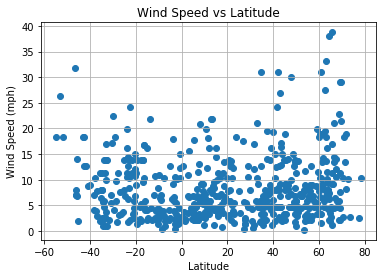

In [14]:
plt.scatter(lat_w_df['Latitude'], lat_w_df['Wind Speed (mph)'])
plt.title("Wind Speed vs Latitude")
plt.ylabel('Wind Speed (mph)')
plt.xlabel("Latitude")
plt.grid(True)
# Save the Figure
plt.savefig('Wind Speed vs Lat.png')
# Show the Figure
plt.show()